# 1. Twitch API data

The URL `https://wind-bow.glitch.me/twitch-api/channels/{CHANNEL_NAME}` is an API from twitch to get data from twitch channels.

Get the data from the following channels:

```
["ESL_SC2", "OgamingSC2", "cretetion", "freecodecamp", 
    "storbeck", "habathcx", "RobotCaleb", "noobs2ninjas",
    "ninja", "shroud", "Dakotaz", "esltv_cs", "pokimane", 
    "tsm_bjergsen", "boxbox", "wtcn", "a_seagull",
    "kinggothalion", "amazhs", "jahrein", "thenadeshot", 
    "sivhd", "kingrichard"]
```

To make into a dataframe that looks like this:

![](twitch.png)

In [267]:
import pandas as pd 
import requests
import json
import matplotlib.pylab as plt 
#Empty pandas Data Frame
L=[]

CHANNEL_NAME=["ESL_SC2", "OgamingSC2", "cretetion", "freecodecamp", 
    "storbeck", "habathcx", "RobotCaleb", "noobs2ninjas",
    "ninja", "shroud", "Dakotaz", "esltv_cs", "pokimane", 
    "tsm_bjergsen", "boxbox", "wtcn", "a_seagull",
    "kinggothalion", "amazhs", "jahrein", "thenadeshot", 
    "sivhd", "kingrichard"]

for chan in CHANNEL_NAME:
    r = requests.get(F'https://wind-bow.glitch.me/twitch-api/channels/{chan}')

    L.append(json.loads(r.content))
    df=pd.DataFrame(L)[['_id','display_name','status','followers','views']]

In [268]:
# it seems that some data are not available anymore 
L[-15:] 


[{'status': 404, 'error': 'not found'},
 {'status': 404, 'error': 'not found'},
 {'status': 404, 'error': 'not found'},
 {'status': 404, 'error': 'not found'},
 {'status': 404, 'error': 'not found'},
 {'status': 404, 'error': 'not found'},
 {'status': 404, 'error': 'not found'},
 {'status': 404, 'error': 'not found'},
 {'status': 404, 'error': 'not found'},
 {'status': 404, 'error': 'not found'},
 {'status': 404, 'error': 'not found'},
 {'status': 404, 'error': 'not found'},
 {'status': 404, 'error': 'not found'},
 {'status': 404, 'error': 'not found'},
 {'status': 404, 'error': 'not found'}]

In [269]:
df=df.dropna()
df.rename(columns={'_id':'id'},inplace=True)
df[['id','followers','views']]=df[['id','followers','views']].astype(int)
df

,id,display_name,status,followers,views
0,30220059,ESL_SC2,RERUN: StarCraft 2 - Terminator vs. Parting (P...,135394,60991791
1,71852806,OgamingSC2,UnderDogs - Rediffusion - Qualifier.,40895,20694507
2,90401618,cretetion,It's a Divison kind of Day,908,11631
3,79776140,FreeCodeCamp,Greg working on Electron-Vue boilerplate w/ Ak...,10122,163747
5,6726509,Habathcx,Massively Effective,14,764
6,54925078,RobotCaleb,Code wrangling,20,4602
7,82534701,noobs2ninjas,Building a new hackintosh for #programming and...,835,48102


# 2. App Store Reviews

The Apple app store has a `GET` API to get reviews on apps. The URL is:

```
https://itunes.apple.com/{COUNTRY_CODE}/rss/customerreviews/id={APP_ID_HERE}/page={PAGE_NUMBER}/sortby=mostrecent/json
```

Note that you need to provide:

- The country code (eg. `'us'`, `'gb'`, `'ca'`, `'au'`) 

- The app ID. This can be found in the web page for the app right after `id`. For instance, Candy Crush's US webpage is:

`https://apps.apple.com/us/app/candy-crush-saga/id553834731`

So here the ID would be `553834731`.

- The "Page Number". The request responds with multiple pages of data, but sends them one at a time. So you can cycle through the data pages for any app on any country.

### 2.1 English app reviews

Get all english reviews you can for Candy Crush, Tinder, the Facebook app and Twitter (you have to get them from all the english-speaking countries you can think of!).

### 2.2 Best version

For each app, get the version that is the best rated.

Make a visualization of the ratings per versions per app to show this.

### 2.3 Top words

Which word for each app is most common in the 5 star and in the 1-star review's titles?

Note: `df.title.str.get_dummies()` is your friend

Note: This might create a lot of data! Try to break down your analysis in chunks if it doesn't work.

In [270]:
#2.1  ( I'm getting the data for all 3 parts of this question)
apps={'CandyCrush':553834731,'Tinder':547702041,'FaceBook':284882215,'Twitter':333903271}

#I'm just going to stick to these contries, I tried with more but
#The graphs were not good looking, and loading the data was too 
#long  and the x ticks were not visible. ( I could only get the best version only )
#but I think loading all the pages for those 4 contries is ok 
CC=['us', 'gb', 'ca', 'au']

df=pd.DataFrame()
app_list=list(apps.keys())

for app in app_list:

    APP_ID_HERE=apps[app]

    
    for COUNTRY_CODE in CC:
        keys = ['im:version','im:rating','title']
        L=[]
        it=1
        #loadging all the pages that I can load with the API 
        while True:
            try:
                URL=F'https://itunes.apple.com/{COUNTRY_CODE}/rss/customerreviews/id={APP_ID_HERE}/page={it}/sortby=mostrecent/json'
                r = requests.get(URL)
                L.append(json.loads(r.content)['feed']['entry'])
                it+=1
            except : 
                #if the num pages is too big it stops and print the Num of pages
                print(F'Number of pages:{it-1}')
                break

        
        for i in range(len(L)):
            df_i=pd.DataFrame(L[i])[keys]
            for j in range(len(df_i)):
                df_i['im:version'].iloc[j]=df_i['im:version'].iloc[j]['label']
                df_i['im:rating'].iloc[j]=df_i['im:rating'].iloc[j]['label']
                df_i['title'].iloc[j]=df_i['title'].iloc[j]['label']
            df_i['App']=app    
            df=df.append(df_i,ignore_index=True)
            
df['im:rating']=df['im:rating'].astype(int)



Number of pages:10
Number of pages:10
Number of pages:10
Number of pages:10
Number of pages:10
Number of pages:10
Number of pages:10
Number of pages:10
Number of pages:10
Number of pages:10
Number of pages:10
Number of pages:10
Number of pages:10
Number of pages:10
Number of pages:10
Number of pages:10


In [271]:
df

,im:version,im:rating,title,App
0,1.196.1.1,5,Exercise for the brain,CandyCrush
1,1.196.1.1,1,App stopped working after updating,CandyCrush
2,1.196.1.1,5,Great game but you'll spend lots of money if y...,CandyCrush
3,1.196.1.1,1,Not fun anymore,CandyCrush
4,1.196.1.1,5,Perdí todos mis puntos,CandyCrush
...,...,...,...,...
7995,8.43,1,Left leaning BIASED APP - Gone to Parler,Twitter
7996,8.43,1,Censorship is over the top,Twitter
7997,8.43,3,Taken off periscope,Twitter
7998,8.43,2,Good app but to avoid advert pollution. Go els...,Twitter


In [272]:
#2.2 best version for each apps 
import seaborn as sns
sns.set_theme()
for app in app_list:
    
    df_plot=df.loc[df.App==app].groupby('im:version').mean()

    print(
        F'App:{app},\
         best version: {df_plot["im:rating"].idxmax()},\
         avg rating {df_plot["im:rating"].max()}\n')

'''
    fig, ax = plt.subplots(figsize=(10,7))
    df_plot.plot(ax=ax)
    ax.set_title(app)
    ax.set_ylabel('Average rating')
    ax.set_xlabel('version')
   # plt.xticks(values,x)
    ax.legend().remove()
    #plt.xticks(rotation=90)
    plt.show()'''
print('next cell for graphs')


App:CandyCrush,         best version: 1.154.1,         avg rating 4.333333333333333

App:Tinder,         best version: 11.26.0,         avg rating 1.6923076923076923

App:FaceBook,         best version: 304.0,         avg rating 1.6785714285714286

App:Twitter,         best version: 7.51.5,         avg rating 3.0

next cell for graphs


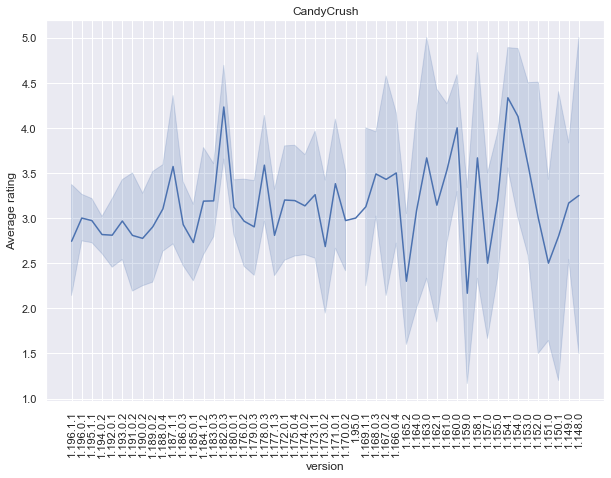

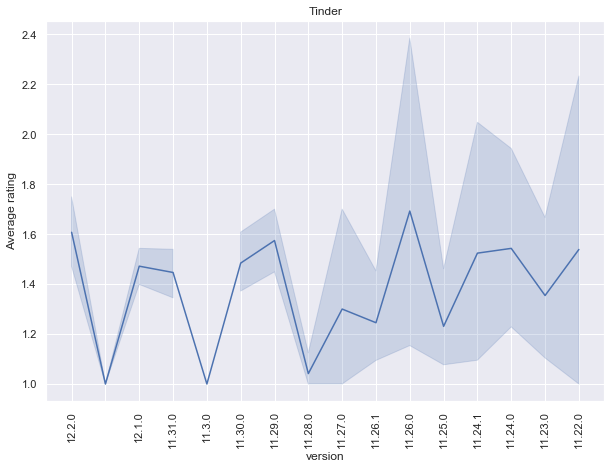

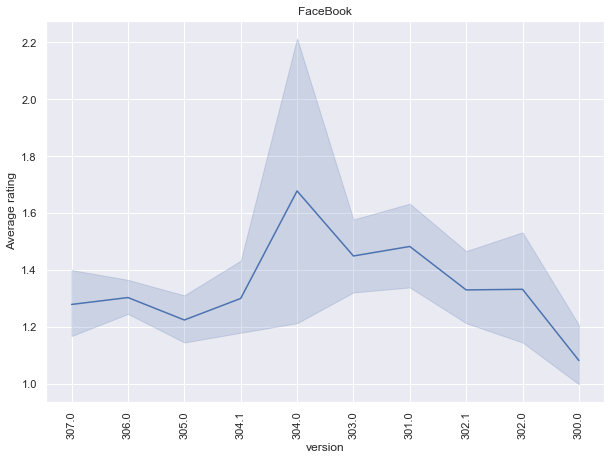

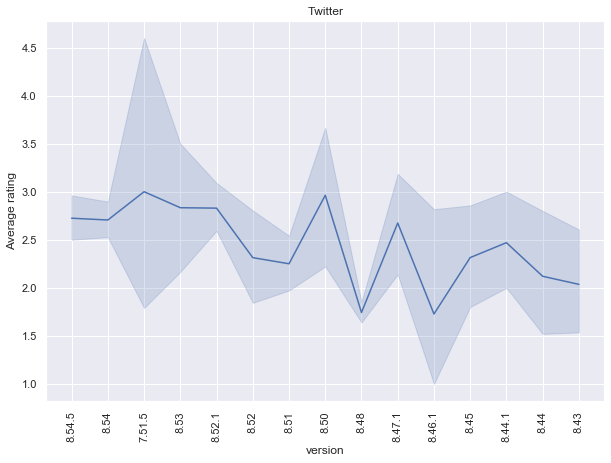

In [273]:
#2.3 visualisation 
import seaborn as sns
sns.set_theme()
for app in app_list:
    fig, ax = plt.subplots(figsize=(10,7))
    df_plot=df.loc[df.App==app]


    sns.lineplot(x='im:version',y='im:rating',data=df_plot,ax=ax)
    ax.set_title(app)
    ax.set_ylabel('Average rating')
    ax.set_xlabel('version')
    plt.xticks(rotation=90)
    
    plt.show()

In [274]:
#2.3 #most common words for each apps for 1 and 5 stars ratings
df.title=df.title.str.lower()
df_title=pd.get_dummies(df[['title','App','im:rating']], columns=['title']).groupby(['im:rating','App']).sum(axis=0)


In [275]:
df_title_final=df_title.idxmax(axis=1).to_frame().reset_index()

#getting the number of time the title is repeated
df_title_final['count']=df_title.max(axis=1).reset_index()[0]

df_title_final=df_title_final.loc[
    (df_title_final['im:rating']==1)|(df_title_final['im:rating']==5)]

df_title_final=df_title_final.rename(columns={0:"title"})

df_title_final['title']=df_title_final['title'].str.replace('title_','')
df_title_final


,im:rating,App,title,count
0,1,CandyCrush,candy crush,16
1,1,FaceBook,censorship,83
2,1,Tinder,banned for no reason,107
3,1,Twitter,censorship,84
16,5,CandyCrush,candy crush,82
17,5,FaceBook,facebook,4
18,5,Tinder,10/10,2
19,5,Twitter,twitter,27


# 3 (STRETCH) IMDB scraping

IMDB has structured web pages. We can exploit this to scrape movie data.

Usinf the following URL:

`https://www.imdb.com/search/title/?groups=top_1000&start={PAGE_NUMBER}&ref_=adv_nxt`

With the following headers in your `GET` request: `{"Accept-Language": "en-US,en;q=0.5"}`

You can generate a dataframe like this one by cycling over the page numbers in the URL requested:

![](IMDB.png)

Note that the following  page attribues will be of interest:

- `div` with a class of `lister-item mode-advanced`

- Various `span` objects within that `div` like `lister-item-year` and `runtime` and `metascore`